In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('uk_road_accident.csv')

In [4]:
df['Accident Date'] = df['Accident Date'].astype(str)
# Step 2: Replace '/' with '-' safely
df['Accident Date'] = df['Accident Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
# Step 3: Strip whitespace
df['Accident Date'] = df['Accident Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
# Step 4: Convert to datetime
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True, errors='coerce')


df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mode()[0])
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mode()[0])
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna('unaccounted')
df['Road_Type'] = df['Road_Type'].fillna('unaccounted')
df['Weather_Conditions'] = df['Weather_Conditions'].fillna('unaccounted')

df.dtypes
df.isnull().sum()

df['Year'] = df['Accident Date'].dt.year
df['Month'] =  df['Accident Date'].dt.month
df['Day'] =  df['Accident Date'].dt.day
df['DayOfWeek'] =  df['Accident Date'].dt.dayofweek
df.isnull().sum()

Index                       0
Accident_Severity           0
Accident Date               0
Latitude                    0
Light_Conditions            0
District Area               0
Longitude                   0
Number_of_Casualties        0
Number_of_Vehicles          0
Road_Surface_Conditions     0
Road_Type                   0
Urban_or_Rural_Area        15
Weather_Conditions          0
Vehicle_Type                0
Year                        0
Month                       0
Day                         0
DayOfWeek                   0
dtype: int64

<Axes: xlabel='Year'>

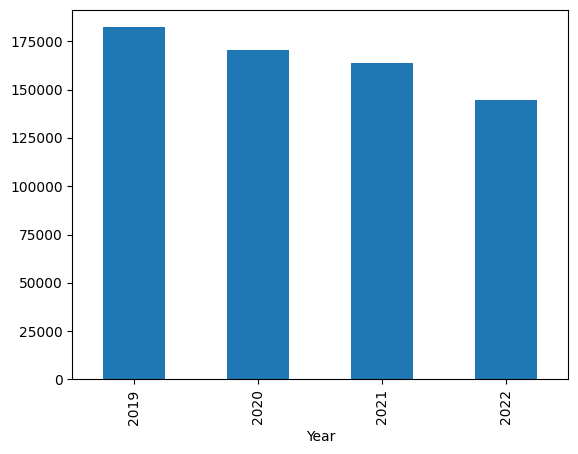

In [5]:
import matplotlib.pyplot as plt
df.groupby('Year')['Index'].count().plot(kind='bar')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660664 non-null  object        
 12  Weather_Conditio

<h1>Car Accident Trend</h1>

In [7]:
import folium
from folium.plugins import HeatMap

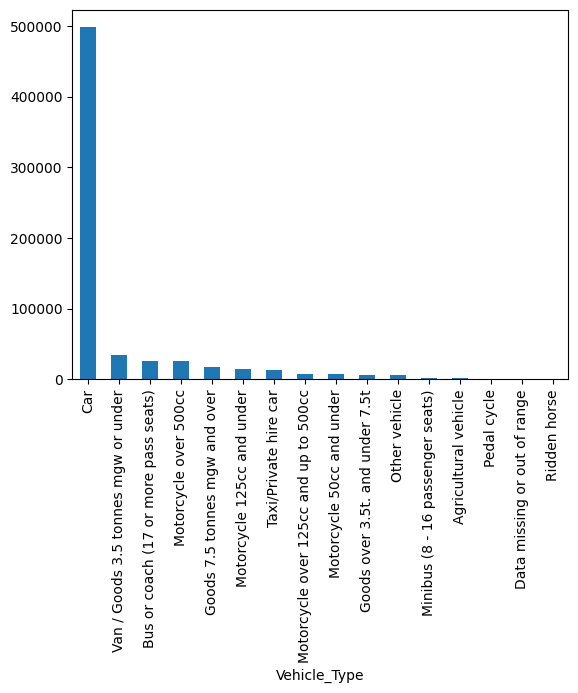

In [8]:
df['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()

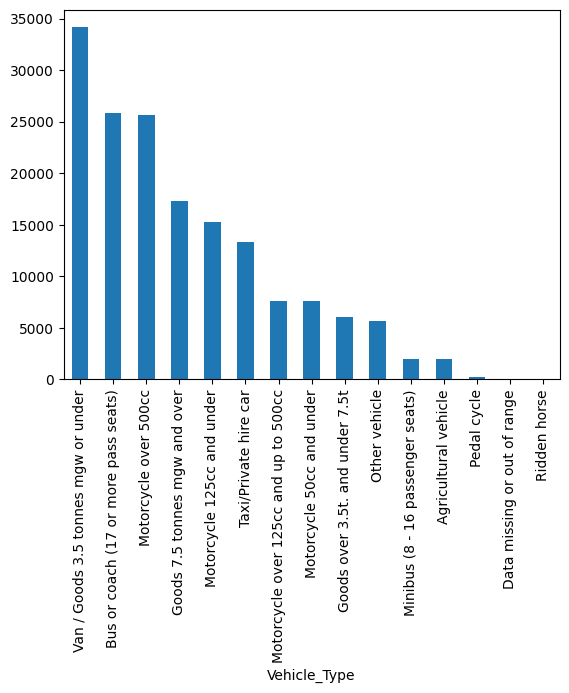

In [9]:
nocar_df = df[df['Vehicle_Type'] != 'Car']
nocar_df['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()

<h1>Question: Which year had the highest peak in monthly road accidents, and during what month did this peak occur?</h1>

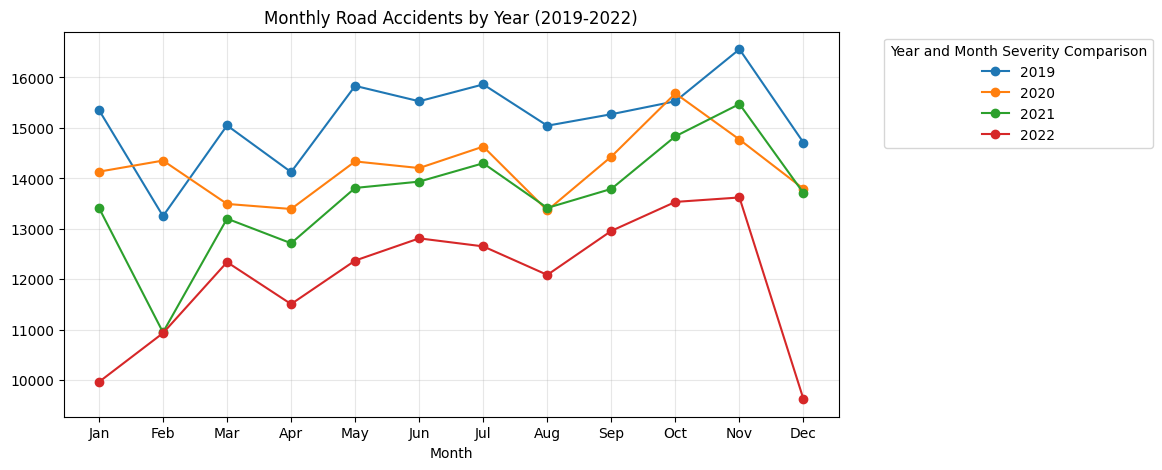

In [10]:
monthly_data = df.groupby(['Year', 'Month']).size()

monthly_data = monthly_data.unstack(level=0)

monthly_data.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h1>Insight 1: The blue line, representing 2022, shows a significant spike in accidents, reaching its highest point in November.
    <hr>
Insight 2: There appears to be a general trend across most years for accident numbers to increase towards the latter half of the year, particularly in the fall and early winter months.
<hr>
Insight 3: The red line (2019) and the green line (2021) show a noticeable drop in accident numbers in December, contrasting with the high numbers seen in the blue line (2022) and the orange line (2020) for the same month.
</h1>
<hr>

<h1>Question: How did the distribution of accident severity change from 2019 to 2022, and which year had the highest number of fatal accidents?</h1>

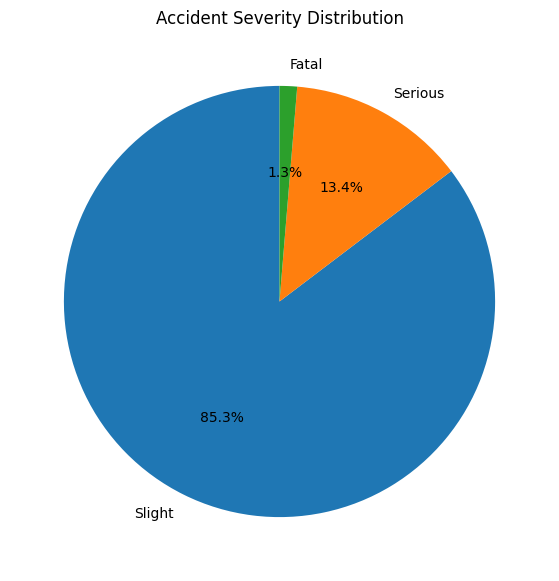

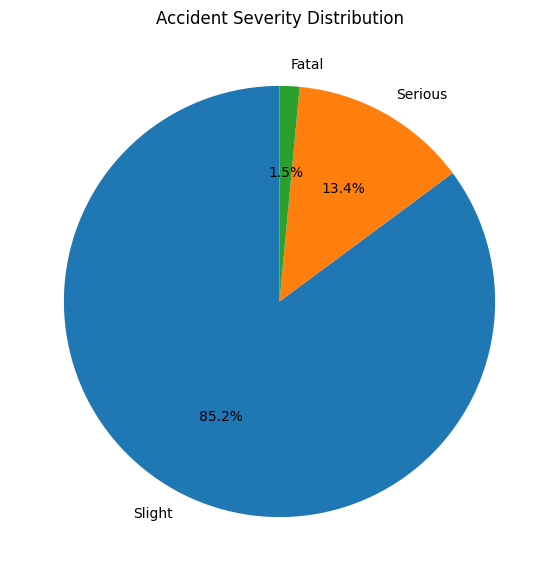

In [11]:
severity_counts = df['Accident_Severity'].value_counts()

plt.pie(severity_counts,
        labels = severity_counts.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


severity_2019 = df[df['Year'] == 2019]
sc_2019 = severity_2019['Accident_Severity'].value_counts()

plt.pie(sc_2019,
        labels = sc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h1>Insight 1 (Overall Trend): The total number of accidents appears to have decreased significantly in 2020, likely due to the COVID-19 pandemic, and then increased sharply in 2021 and 2022, surpassing pre-pandemic levels.</h1><hr>
<h1>Insight 2 (Severity Trend): While slight accidents make up the largest portion of the total, the number of serious and fatal accidents also shows an increasing trend, particularly from 2020 to 2022. The year 2022 has the highest number of serious and fatal accidents.</h1><hr>
<h1>Insight 3 (Proportional Analysis): The proportion of serious and fatal accidents seems to be relatively stable across the years, even with the total number of accidents fluctuating. This suggests that the severity mix of accidents hasn't changed drastically, but the sheer volume of severe incidents is increasing.</h1>
<hr>

In [12]:
df["District Area"].unique()

array(['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames',
       'Hammersmith and Fulham', 'Hounslow', 'Tower Hamlets',
       'City of London', 'Southwark', 'Camden', 'Hackney', 'Islington',
       'Barnet', 'Brent', 'Haringey', 'Merton', 'Ealing', 'Enfield',
       'Greenwich', 'Newham', 'London Airport (Heathrow)', 'Hillingdon',
       'Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Bromley',
       'Havering', 'Croydon', 'Lambeth', 'Wandsworth', 'Sutton', 'Bexley',
       'Lewisham', 'Harrow', 'Kingston upon Thames', 'Barrow-in-Furness',
       'South Lakeland', 'Carlisle', 'Eden', 'Allerdale', 'Copeland',
       'Fylde', 'Blackpool', 'Wyre', 'Lancaster', 'Chorley',
       'West Lancashire', 'South Ribble', 'Preston',
       'Blackburn with Darwen', 'Hyndburn', 'Ribble Valley', 'Burnley',
       'Pendle', 'Rossendale', 'Wirral', 'Liverpool', 'Sefton',
       'Knowsley', 'St. Helens', 'Manchester', 'Salford', 'Tameside',
       'Stockport', 'Bolton', 'Wigan', '

In [13]:
df_kensington = df[df["District Area"] == "Kensington and Chelsea"]
df_kensington

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533088,201001TB00796,Slight,2022-11-14,51.489306,Darkness - lights lit,Kensington and Chelsea,-0.175749,2,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2022,11,14,0
533316,201001TE00005,Serious,2022-01-17,51.520998,Daylight,Kensington and Chelsea,-0.213258,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,1,17,0
533327,201001TE00016,Serious,2022-02-02,51.497193,Daylight,Kensington and Chelsea,-0.168230,1,2,Wet or damp,Dual carriageway,Urban,Raining no high winds,Car,2022,2,2,2
533337,201001TE00029,Serious,2022-03-12,51.480287,Darkness - lights lit,Kensington and Chelsea,-0.185614,1,1,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2022,3,12,5


In [14]:
print(df_kensington.columns.tolist())

['Index', 'Accident_Severity', 'Accident Date', 'Latitude', 'Light_Conditions', 'District Area', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type', 'Year', 'Month', 'Day', 'DayOfWeek']


<h1>Question: Which day of the week in 2020 had the lowest number of accidents, and what was the most frequent type of accident severity overall?</h1>

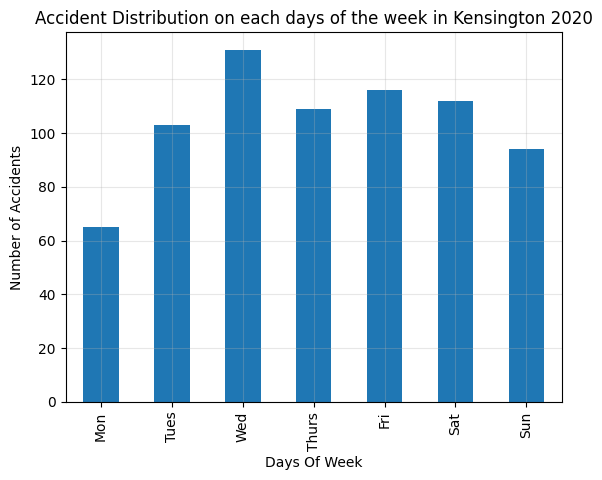

DayOfWeek
0     65
1    103
2    131
3    109
4    116
5    112
6     94
Name: count, dtype: int64

In [17]:
df_kensington = df_kensington[df_kensington["Year"] == 2020]

df_kensington_weekend = df_kensington['DayOfWeek'].value_counts().sort_index()

df_kensington_weekend.plot(kind='bar')
plt.title('Accident Distribution on each days of the week in Kensington 2020')
plt.xlabel('Days Of Week')
plt.xticks(range(0, 7), ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"])
plt.ylabel('Number of Accidents')
plt.grid(alpha=0.3)
plt.show()

df_kensington_weekend


<h1>Insights<hr>
Weekend Contrast: The bar chart for Kensington in 2020 reveals a clear pattern: road accidents are at their lowest on Monday and Sunday, suggesting that both the start and end of the traditional work week see less traffic-related incidents.
<hr>
Mid-Week Peak: Accidents peak in the middle of the week, with Wednesday recording the highest number of incidents. The number of accidents remains relatively high on Friday and Saturday as well.
<hr>
Overwhelmingly Slight: The pie chart illustrates that a vast majority of all accidents are classified as "slight." Combined, "serious" and "fatal" accidents make up only a small fraction of the total distribution, at 13.4% and 1.3% (or 1.5%), respectively.

</h1>

<h1>Question: What specific factors at the intersection of roads like Prescott Place, St Oswalds Street, and Limerston Street could be contributing to the high concentration of accidents shown in the heatmap?</h1>

In [24]:
df_kensington = df[df['District Area'] == 'Liverpool']

locations = list(zip(df_kensington['Latitude'], df_kensington['Longitude']))

myMap = folium.Map(locations=[df_kensington['Latitude'].mean(), df_kensington['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(myMap)

myMap.save('df_kensington_map.html')
myMap

<h1>Insights: The heatmap identifies multiple "hot spots" of high accident frequency, with the most intense concentration appearing at the intersection near Prescott Place and St Oswalds Street. This suggests that these particular intersections, rather than the long stretches of road between them, are critical areas for safety intervention and could be impacted by factors such as complex road layouts, high traffic volume, or the confluence of multiple busy streets.</h1>